# **Escuela Politécnica Nacional**
## **[Tarea 04] Ejercicios Unidad 02-A | Bisección**
### **Nombre:** Luis Alexander Lema Delgado
### **Fecha:**  04/11/2025
### **Curso:** GR1CC 

### **Repositorio:**

https://github.com/LuisALema/Metodos_Numericos_2025B/tree/main/Deberes/Tarea04


**CONJUNTO DE EJERCICIOS**

**1. Use el método de bisección para encontrar soluciones precisas dentro de 10^-2 para**

$$
x^3 - 7x^2 + 14x - 6 = 0
$$

**en cada intervalo.**

In [5]:
import matplotlib.pyplot as plt
import numpy as np


**a.[0,1]**

Valor de la solución: 0.58594
Total de ciclos ejecutados: 6


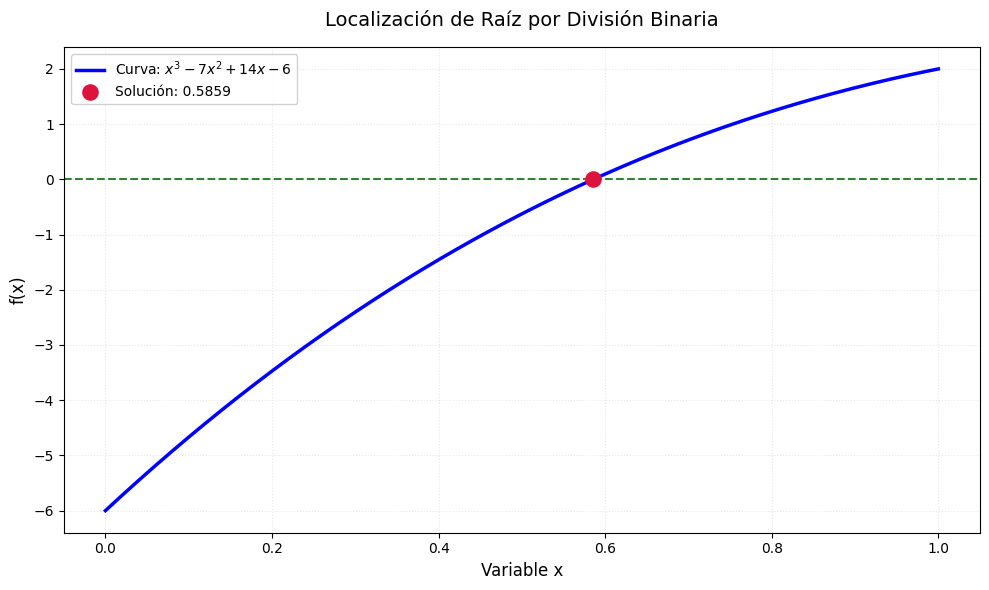

In [6]:

def encontrar_cero(func, extremo_izq, extremo_der, precision=1e-2, limite_ciclos=1000):
    # Evaluar función en los extremos
    f_izq = func(extremo_izq)
    f_der = func(extremo_der)
    
    # Verificar cambio de signo
    if f_izq * f_der >= 0:
        raise RuntimeError("No hay cambio de signo en los límites proporcionados.")
    
    contador_ciclos = 0
    ancho_intervalo = extremo_der - extremo_izq
    
    while ancho_intervalo / 2.0 > precision and contador_ciclos < limite_ciclos:
        punto_central = (extremo_izq + extremo_der) / 2.0
        f_central = func(punto_central)
        contador_ciclos += 1
        
        if abs(f_central) < 1e-12:  # Cero encontrado
            return punto_central, contador_ciclos
            
        # Actualizar intervalo
        if f_izq * f_central < 0:
            extremo_der = punto_central
            f_der = f_central
        else:
            extremo_izq = punto_central
            f_izq = f_central
            
        ancho_intervalo = extremo_der - extremo_izq
    
    aproximacion_final = (extremo_izq + extremo_der) / 2.0
    return aproximacion_final, contador_ciclos

# Definir la función matemática
def funcion_ejemplo(x):
    return x**3 - 7*x**2 + 14*x - 6

# Configurar parámetros
limite_inferior, limite_superior = 0.0, 1.0
nivel_precision = 1e-2

# Ejecutar algoritmo
solucion, total_iteraciones = encontrar_cero(funcion_ejemplo, limite_inferior, 
                                           limite_superior, nivel_precision)

print(f"Valor de la solución: {solucion:.5f}")
print(f"Total de ciclos ejecutados: {total_iteraciones}")

# Crear visualización
puntos_x = np.linspace(limite_inferior, limite_superior, 500)
puntos_y = funcion_ejemplo(puntos_x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(puntos_x, puntos_y, 'b-', linewidth=2.5, 
        label='Curva: $x^3 - 7x^2 + 14x - 6$')
ax.axhline(y=0, color='darkgreen', linestyle='--', alpha=0.8)
ax.scatter(solucion, funcion_ejemplo(solucion), color='crimson', s=120, 
          zorder=6, label=f'Solución: {solucion:.4f}')
ax.set_title('Localización de Raíz por División Binaria', fontsize=14, pad=15)
ax.set_xlabel('Variable x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.legend(framealpha=0.9, loc='upper left')
ax.grid(True, alpha=0.3, linestyle=':')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

**b. [1,3.2]**

Resultado obtenido: 2.99805
Cantidad de iteraciones requeridas: 8


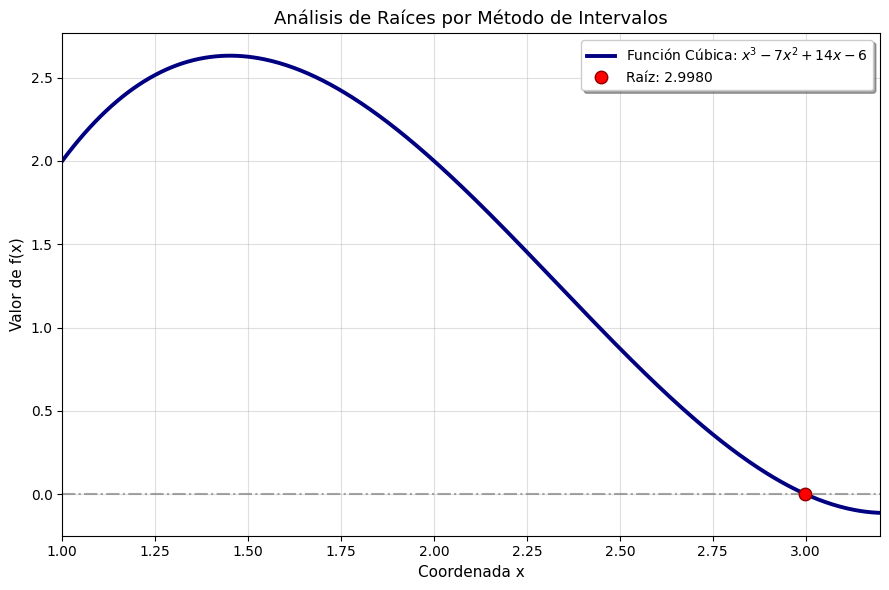

In [7]:

def metodo_division_intervalos(func_obj, lim_min, lim_max, exactitud=1e-2, max_pasos=1000):
    # Calcular valores en los bordes
    valor_min = func_obj(lim_min)
    valor_max = func_obj(lim_max)
    
    # Confirmar existencia de raíz
    if valor_min * valor_max >= 0:
        raise ArithmeticError("No se detecta cambio de signo en los límites del intervalo.")
    
    numero_pasos = 0
    longitud_actual = lim_max - lim_min
    
    while longitud_actual > exactitud and numero_pasos < max_pasos:
        punto_medio = (lim_min + lim_max) * 0.5
        valor_medio = func_obj(punto_medio)
        numero_pasos += 1
        
        # Verificar si encontramos la solución exacta
        if abs(valor_medio) < 1e-15:
            return punto_medio, numero_pasos
        
        # Reducir el intervalo
        if valor_min * valor_medio < 0:
            lim_max = punto_medio
            valor_max = valor_medio
        else:
            lim_min = punto_medio
            valor_min = valor_medio
        
        longitud_actual = lim_max - lim_min
    
    resultado_final = (lim_min + lim_max) * 0.5
    return resultado_final, numero_pasos

# Configuración del dominio de búsqueda
inicio, fin = 1.0, 3.2
margen_error = 1e-2

# Ejecutar el procedimiento
raiz_aproximada, conteo_iteraciones = metodo_division_intervalos(
    lambda x: x**3 - 7*x**2 + 14*x - 6, inicio, fin, margen_error)

# Mostrar resultados
print(f"Resultado obtenido: {raiz_aproximada:.5f}")
print(f"Cantidad de iteraciones requeridas: {conteo_iteraciones}")

# Generar representación gráfica
valores_eje_x = np.linspace(inicio, fin, 450)
valores_eje_y = valores_eje_x**3 - 7*valores_eje_x**2 + 14*valores_eje_x - 6

figura, plano = plt.subplots(figsize=(9, 6))
plano.plot(valores_eje_x, valores_eje_y, color='navy', linewidth=2.8, 
          label='Función Cúbica: $x^3 - 7x^2 + 14x - 6$')
plano.axhline(0, color='gray', linestyle='-.', alpha=0.7)
plano.plot(raiz_aproximada, 0, 'ro', markersize=9, 
          label=f'Raíz: {raiz_aproximada:.4f}', markeredgecolor='darkred')
plano.set_title('Análisis de Raíces por Método de Intervalos', fontsize=13)
plano.set_xlabel('Coordenada x', fontsize=11)
plano.set_ylabel('Valor de f(x)', fontsize=11)
plano.legend(loc='best', frameon=True, fancybox=True, shadow=True)
plano.grid(True, alpha=0.4, linestyle='-')
plano.set_xlim([inicio, fin])

plt.tight_layout()
plt.show()

**c.[3.2,4]**

Punto solución: 3.41875
Ciclos computados: 6


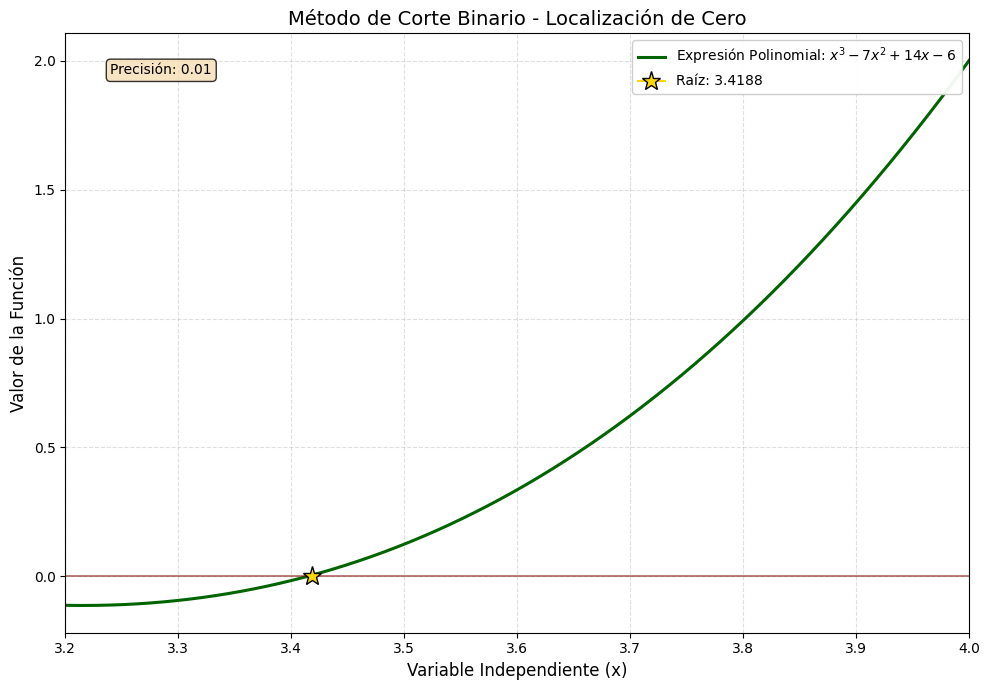

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def algoritmo_corte_binario(funcion_objetivo, extremo_A, extremo_B, error_max=1e-2, iter_max=100):
    # Verificar condiciones iniciales
    eval_A = funcion_objetivo(extremo_A)
    eval_B = funcion_objetivo(extremo_B)
    
    if eval_A * eval_B >= 0:
        raise ValueError("Intervalo no válido: la función no cambia de signo")
    
    contador = 0
    rango_actual = extremo_B - extremo_A
    
    while rango_actual > 2 * error_max and contador < iter_max:
        punto_central = extremo_A + (extremo_B - extremo_A) / 2
        eval_central = funcion_objetivo(punto_central)
        contador += 1
        
        # Verificar si encontramos la solución exacta
        if abs(eval_central) < 1e-14:
            return punto_central, contador
        
        # Ajustar los límites del intervalo
        if eval_A * eval_central < 0:
            extremo_B = punto_central
            eval_B = eval_central
        else:
            extremo_A = punto_central
            eval_A = eval_central
        
        rango_actual = extremo_B - extremo_A
    
    punto_solucion = extremo_A + (extremo_B - extremo_A) / 2
    return punto_solucion, contador

# Configuración del problema
limite_A, limite_B = 3.2, 4.0
precision_requerida = 1e-2

# Definición de la función polinomial
def polinomio(x):
    return (x * x * x) - (7 * x * x) + (14 * x) - 6

# Aplicar el método numérico
solucion_encontrada, numero_ciclos = algoritmo_corte_binario(
    polinomio, limite_A, limite_B, precision_requerida)

# Presentar resultados
print(f"Punto solución: {solucion_encontrada:.5f}")
print(f"Ciclos computados: {numero_ciclos}")

# Configurar visualización
dominio_x = np.linspace(limite_A, limite_B, 350)
imagen_y = polinomio(dominio_x)

figura, ejes = plt.subplots(figsize=(10, 7))
ejes.plot(dominio_x, imagen_y, color='darkgreen', linewidth=2.2, 
         label='Expresión Polinomial: $x^3 - 7x^2 + 14x - 6$')
ejes.axhline(0, color='maroon', linestyle='-', alpha=0.6, linewidth=1.2)
ejes.plot(solucion_encontrada, 0, marker='*', color='gold', markersize=14, 
         markeredgecolor='black', label=f'Raíz: {solucion_encontrada:.4f}')
ejes.set_title('Método de Corte Binario - Localización de Cero', fontsize=14)
ejes.set_xlabel('Variable Independiente (x)', fontsize=12)
ejes.set_ylabel('Valor de la Función', fontsize=12)
ejes.legend(loc='upper right', framealpha=0.95)
ejes.grid(True, alpha=0.4, linestyle='--')
ejes.set_xlim(limite_A, limite_B)

# Añadir información adicional en el gráfico
ejes.text(0.05, 0.95, f'Precisión: {precision_requerida}', 
         transform=ejes.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

**2. a. Dibuje las gráficas para 𝑦 = 𝑥 y 𝑦 = sin 𝑥.**

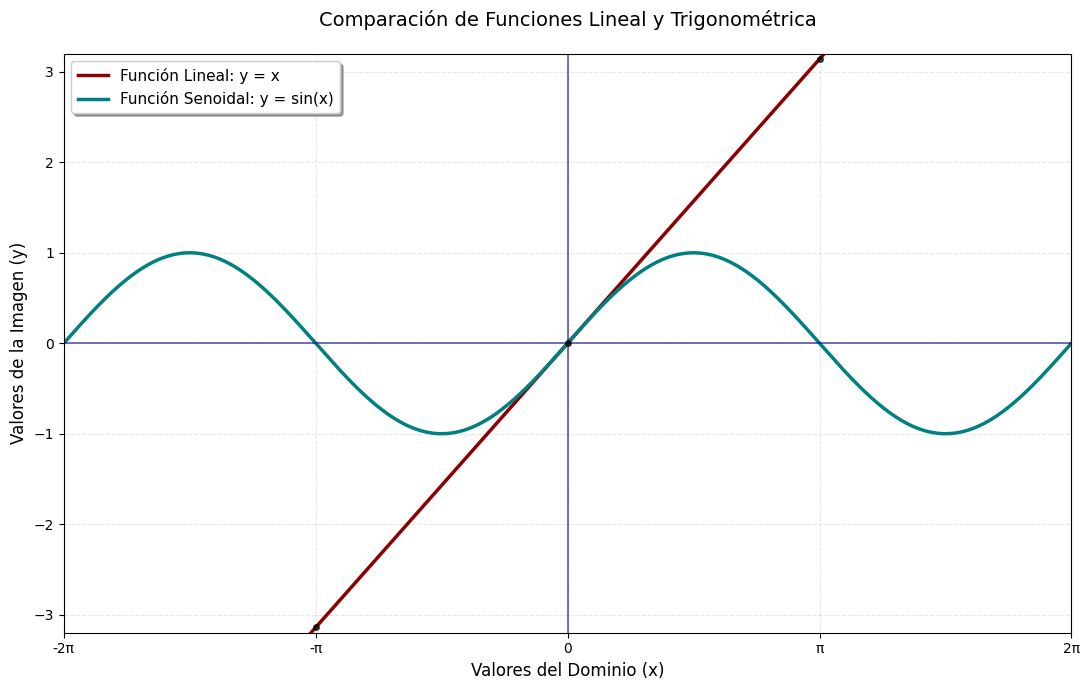

In [9]:

# Configurar el dominio de visualización
dominio = np.linspace(-2 * np.pi, 2 * np.pi, 500)

# Calcular las curvas
linea_recta = dominio
onda_sinusoidal = np.sin(dominio)

# Configurar el área de visualización
fig, ax = plt.subplots(figsize=(11, 7))

# Trazar las funciones
ax.plot(dominio, linea_recta, color='darkred', linewidth=2.5, 
        label='Función Lineal: y = x')
ax.plot(dominio, onda_sinusoidal, color='teal', linewidth=2.5, 
        label='Función Senoidal: y = sin(x)')

# Añadir ejes coordenados
ax.axhline(y=0, color='navy', linestyle='-', alpha=0.7, linewidth=1.1)
ax.axvline(x=0, color='navy', linestyle='-', alpha=0.7, linewidth=1.1)

# Personalizar el gráfico
ax.set_title('Comparación de Funciones Lineal y Trigonométrica', 
             fontsize=14, pad=20)
ax.set_xlabel('Valores del Dominio (x)', fontsize=12)
ax.set_ylabel('Valores de la Imagen (y)', fontsize=12)
ax.legend(loc='upper left', frameon=True, shadow=True, 
          fancybox=True, fontsize=11)

# Configurar rejilla y límites
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim([-2*np.pi, 2*np.pi])
ax.set_ylim([-3.2, 3.2])

# Añadir marcas especiales para pi
marcas_pi = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
etiquetas_pi = ['-2π', '-π', '0', 'π', '2π']
ax.set_xticks(marcas_pi)
ax.set_xticklabels(etiquetas_pi)

# Resaltar puntos de intersección
for punto in [-np.pi, 0, np.pi]:
    ax.plot(punto, punto, 'ko', markersize=4, alpha=0.7)

plt.tight_layout()
plt.show()

**b. Use el método de bisección para encontrar soluciones precisas dentro de 10^-5 para el primer valor positivo
de 𝑥 con 𝑥 = 2 sin 𝑥.**

In [12]:
# Definición de la función
def f(x):
    return x - 2 * np.sin(x)

# Intervalo para buscar la raíz
a, b = 0, np.pi # Intervalo [0, pi]
tolerancia = 1e-5

# Encontrar la raíz
raiz, iteraciones = biseccion(f, a, b, tol=tolerancia)

print(f"Raíz encontrada: {raiz:.6f}")
print(f"Iteración en que se encontró la raíz: {iteraciones}")
print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: 1.895491
Iteración en que se encontró la raíz: 18
Solución aproximada en el intervalo [0, 3.141592653589793]: x ≈ 1.895491


**3. a. Dibuje las gráficas para 𝑦 = 𝑥 y 𝑦 = tan 𝑥.**

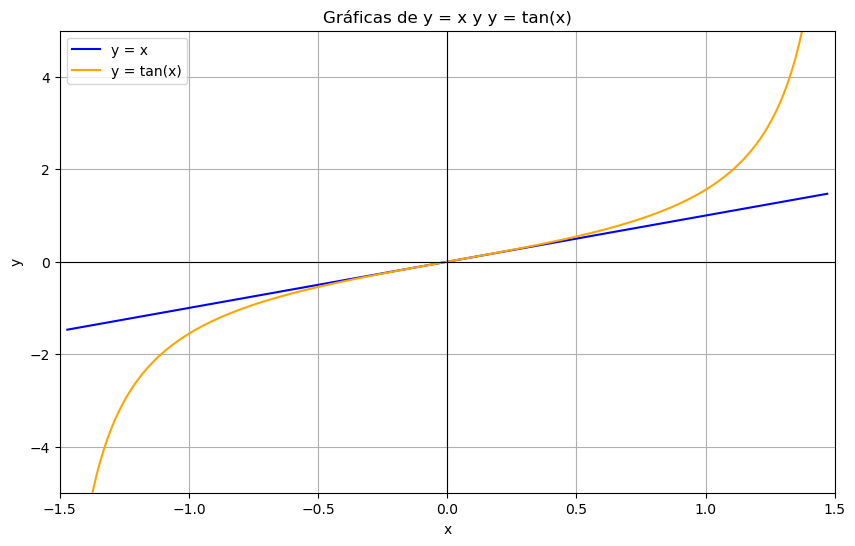

In [25]:
# Definir el rango de x
x1 = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, 400)  # Intervalo evitando las asíntotas

# Definir las funciones
y1 = x1
y2 = np.tan(x1)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='y = x', color='blue')
plt.plot(x1, y2, label='y = tan(x)', color='orange')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Gráficas de y = x y y = tan(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5, 5)  # Limitar el rango y para evitar valores extremos
plt.legend()
plt.grid(True)
plt.xlim(-1.5, 1.5)
plt.show()

**b. Use el método de bisección para encontrar una aproximación dentro de 10^-5 para el primer valor positivo
de 𝑥 con 𝑥 = tan 𝑥.**

In [37]:
# Definir la función para x = tan(x)
def g(x):
    return x - np.tan(x)

# Buscar la raíz en el primer intervalo positivo (entre 0 y pi/2)
a, b = 0, np.pi/2 - 0.1 # evitar la asíntota en pi/2
tolerancia = 1e-5

raiz, iteraciones = biseccion(g, a, b, tol=tolerancia)
print(f"Raíz encontrada: {raiz:.6f}")
print(f"Iteración en que se encontró la raíz: {iteraciones}")
print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: 1.470791
Iteración en que se encontró la raíz: 17
Solución aproximada en el intervalo [0, 1.4707963267948965]: x ≈ 1.470791


**4. a. Dibuje las gráficas para 𝑦 = 𝑥^2 − 1 y 𝑦 = ℯ^(1-x^2)**

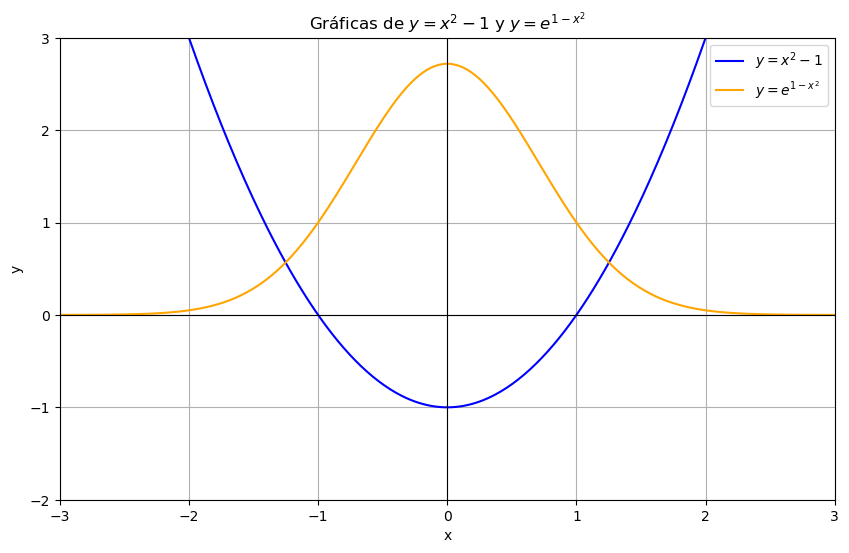

In [38]:
# Definir el rango de x
x = np.linspace(-3, 3, 400)
# Definir las funciones
y1 = x**2 - 1
y2 = np.exp(1 - x**2)
# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label=r'$y = x^2 - 1$', color='blue')
plt.plot(x, y2, label=r'$y = e^{1 - x^2}$', color='orange')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Gráficas de $y = x^2 - 1$ y $y = e^{1 - x^2}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-2, 3)  # Ajustar el rango y para una mejor visualización
plt.show()

**b. Use el método de bisección para encontrar una aproximación dentro de 10^-5 para un valor en [−2, 0] con 𝑥^2 − 1 = ℯ^(1-x^2)**

In [40]:
# Definir la función para x^2 - 1 = e^(1 - x^2)
def h(x):
    return x**2 - 1 - np.exp(1 - x**2)

# Intervalo dado
a, b = -2, 0
tolerancia = 1e-3

# Encontrar la raíz usando el método de bisección
raiz, iteraciones = biseccion(h, a, b, tol=tolerancia)

print(f"Raíz encontrada: {raiz:.6f}")
print(f"Iteración en que se encontró la raíz: {iteraciones}")
print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: -1.250977
Iteración en que se encontró la raíz: 10
Solución aproximada en el intervalo [-2, 0]: x ≈ -1.250977


**5. Sea f(x)=(x+3) (x+1)^2 x(x-1)^3 (x-3). ¿En qué cero f converge el método de bisección cuando se aplica en los siguientes intervalos?**

**a. [-1.5, 2.5]**

In [75]:
# Implementación mejorada del método de bisección
def metodo_biseccion(funcion, limite_inferior, limite_superior, tolerancia, max_iteraciones):

    valor_inferior = funcion(limite_inferior)
    punto = limite_inferior  # Inicializamos el punto fuera del bucle para compararlo después

    for iteracion in range(1, max_iteraciones + 1):
        punto_anterior = punto  # Guardamos el valor anterior
        punto = (limite_inferior + limite_superior) / 2
        valor_punto = funcion(punto)

        if valor_punto == 0 or abs(punto - punto_anterior) < tolerancia:  # Detener si el cambio es menor que la tolerancia
            print(f"Raíz encontrada: p = {punto:.2f}")
            return punto

        if valor_inferior * valor_punto > 0:
            limite_inferior = punto
            valor_inferior = valor_punto
        else:
            limite_superior = punto

    print(f"El método no logró encontrar la raíz después de {max_iteraciones} iteraciones.")
    return None

In [69]:
# Definimos la función
def ecuacion_fx(x):
    return (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3)

# Intervalo inicial y tolerancia
a, b = -1.5, 2.5
TOL = 10**-3
N0 = 50

raiz = metodo_biseccion(ecuacion_fx, a, b, TOL, N0)

if raiz is not None:
    print(f"Iteración en que se encontró la raíz: {iteraciones}")
    print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: p = 0.00
Iteración en que se encontró la raíz: 3
Solución aproximada en el intervalo [-1.5, 2.5]: x ≈ 0.000000


**b. [-0.5, 2.4]**

In [70]:
# Intervalo inicial y tolerancia
a, b = -0.5, 2.4
TOL = 10**-3
N0 = 50

raiz = metodo_biseccion(ecuacion_fx, a, b, TOL, N0)

if raiz is not None:
    print(f"Iteración en que se encontró la raíz: {iteraciones}")
    print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: p = 0.00
Iteración en que se encontró la raíz: 3
Solución aproximada en el intervalo [-0.5, 2.4]: x ≈ 0.000562


**c.[-0.5, 3]**

In [71]:
# Intervalo inicial y tolerancia
a, b = -0.5, 3
TOL = 10**-3
N0 = 50

raiz = metodo_biseccion(ecuacion_fx, a, b, TOL, N0)

if raiz is not None:
    print(f"Iteración en que se encontró la raíz: {iteraciones}")
    print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: p = 3.00
Iteración en que se encontró la raíz: 3
Solución aproximada en el intervalo [-0.5, 3]: x ≈ 2.999146


**d.[-3, -0.5]**

In [72]:
# Intervalo inicial y tolerancia
a, b = -3, - 0.5
TOL = 10**-3
N0 = 50

raiz = metodo_biseccion(ecuacion_fx, a, b, TOL, N0)

if raiz is not None:
    print(f"Iteración en que se encontró la raíz: {iteraciones}")
    print(f"Solución aproximada en el intervalo [{a}, {b}]: x ≈ {raiz:.6f}")

Raíz encontrada: p = -3.00
Iteración en que se encontró la raíz: 3
Solución aproximada en el intervalo [-3, -0.5]: x ≈ -2.999390


### **Discusiones**

**1. Un abrevadero de longitud 𝐿 tiene una sección transversal en forma de semicírculo con radio 𝑟. (Consulte la figura adjunta.) Cuando se llena con agua hasta una distancia ℎ a partir de la parte superior, el volumen 𝑉 de agua es**

$$
V = L \left[ 0.5\pi r^2 - r^2 \operatorname{arcsen}\left(\frac{h}{r}\right) - h\left(r^2 - h^2\right)^{\frac{1}{2}} \right]
$$

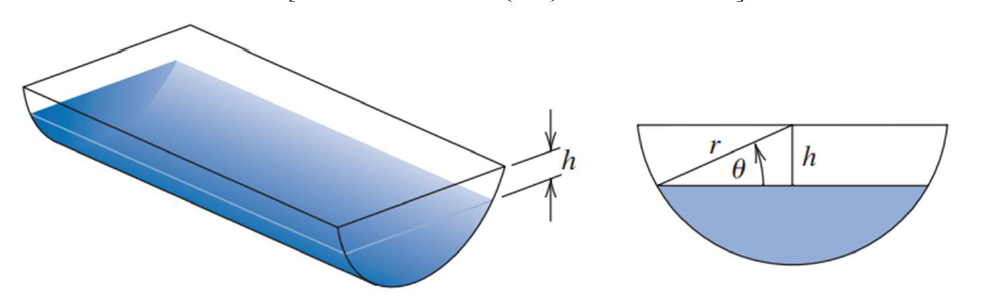

**Suponga que 𝐿 = 10 𝑐𝑚, 𝑟 = 1 𝑐𝑚 y 𝑉 = 12.4 cm^3. Encuentre la profundidad del agua en el abrevadero dentro de 0.01 𝑐𝑚**.

In [89]:
import math
# Definición de la función
def funcion_abrevadero(h):
    return 0.5 * math.pi - math.asin(h) - h * math.sqrt(1 - h**2) - 1.24

# Parámetros
a,b = 0, 1  # Intervalo [0, 1]
tol = 0.01  # Tolerancia más estricta para mayor precisión
max_iter = 100 

# Ejecución
h_solucion = biseccion(funcion_abrevadero, a, b, tol, max_iter)

if h_solucion is not None:
    print(f"La profundidad aproximada del agua es h ≈ {h_solucion:.2f} cm")

Raíz encontrada: p = 0.16, iteración 7
La profundidad aproximada del agua es h ≈ 0.16 cm


**2. Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura s_0   y que la altura del objeto después de 𝑡 segundos es** 

$$
s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1 - e^{-\frac{kt}{m}}\right)
$$

**Donde g=9.81 m/s^2 y k representa el coeficiente de la resistencia del aire en Ns/m. Suponga s_o=300 m, m=0.25 kg y k=0.1 Ns/m. Encuentre, dentro de 0.01 segundos, el tiempo que tarda un cuarto de kg en golpear el piso.**

In [90]:
def altura(t):
    return 300 - 24.525 * t + 61.3125 * (1 - math.exp(-0.4 * t))

# Parámetros
a,b = 0, 20  # Intervalo [0, 1]
tol = 0.01  # Tolerancia más estricta para mayor precisión
max_iter = 100 

# Ejecución
h_solucion = biseccion(altura, a, b, tol, max_iter)

if h_solucion is not None:
    print(f"El tiempo aproximado de caída es t ≈ {h_solucion:.2f} segundos")


Raíz encontrada: p = 14.72, iteración 11
El tiempo aproximado de caída es t ≈ 14.72 segundos


### **EJERCICIOS TEÓRICOS**

**1. Use el teorema 2.1 para encontrar una cota para el numero de iteraciones necesarias para lograr una aproximación con precisión de 10^(-4) para la solución de x^3-x-1=0 que se encuentra dentro del intervalo [1, 2]. Encuentre una aproximación para la raíz con este grado de precisión.**

In [93]:
# Definimos la función
def f(x):
    return x**3 - x - 1

# Intervalo inicial y tolerancia
a, b = 1, 2
TOL = 1e-4

# Cálculo del número de iteraciones necesarias
N = np.ceil(np.log2((b - a) / TOL)).astype(int)
print(f"Número de iteraciones necesarias: {N}")

# Método de bisección para encontrar la raíz
def biseccion(ecuacion, a, b, TOL, N0):
    FA = ecuacion(a)
    p = a  # Inicializamos p fuera del bucle para compararlo después

    for i in range(1, N0 + 1):
        p_anterior = p  # Guardamos el punto anterior
        p = (a + b) / 2
        FP = ecuacion(p)

        if FP == 0 or abs(p - p_anterior) < TOL:  # Detener si el cambio es menor que la tolerancia
            print(f"Raíz encontrada: p = {p:.4f}")
            return p

        if FA * FP > 0:
            a = p
            FA = FP
        else:
            b = p

    print(f"El método falló después de {N0} iteraciones.")
    return None

# Encontrar la raíz con el número de iteraciones calculado
raiz = biseccion(f, a, b, TOL, N)

if raiz is not None:
    print(f"Raíz aproximada en el intervalo [{a}, {b}]: {raiz:.4f}")


Número de iteraciones necesarias: 14
Raíz encontrada: p = 1.3248
Raíz aproximada en el intervalo [1, 2]: 1.3248


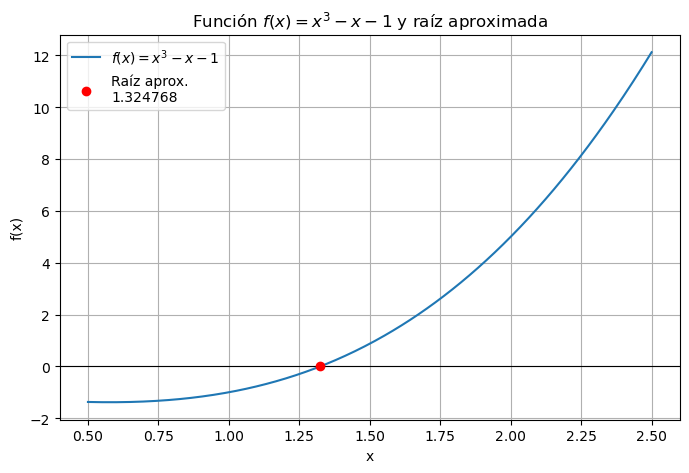

In [94]:
# Graficar la función y la raíz
x_vals = np.linspace(0.5, 2.5, 400)
y_vals = f(x_vals)
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label=r'$f(x) = x^3 - x - 1$')
plt.axhline(0, color='black', linewidth=0.8)
plt.scatter(raiz, f(raiz), color='red', zorder=5, label=f'Raíz aprox.\n{raiz:.6f}')
plt.title('Función $f(x) = x^3 - x - 1$ y raíz aproximada')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**2. La función definida por f(x)=sin⁡π x tiene ceros en cada entero. Muestre cuando -1<a<0 y 2<b<3, el método de bisección converge a**

**a. 0, si a + b < 2**

In [103]:
# Función f(x) = sin(pi x)
def f(x):
    return np.sin(np.pi * x)
#Literal a
a1, b1 = -0.5, 2.2  # Ejemplo válido: suma 1.7 < 2
raiz_a, iter_a = biseccion(f, a1, b1)
print(f"Raíz encontrada: {raiz_a:.6f}")
print(f"Iteración en que se encontró la raíz: {iter_a}")
print(f"Solución aproximada en el intervalo [{a1}, {b1}]: x ≈ {raiz_a:.6f}\n")

Raíz encontrada: 0.000977
Iteración en que se encontró la raíz: 8
Solución aproximada en el intervalo [-0.5, 2.2]: x ≈ 0.000977



**b. 2, si a + b > 2**

In [104]:
# Literal b
a2, b2 = -0.3, 2.8  # Ejemplo válido: suma 2.5 > 2
raiz_b, iter_b = biseccion(f, a2, b2)
print(f"Raíz encontrada: {raiz_b:.6f}")
print(f"Iteración en que se encontró la raíz: {iter_b}")
print(f"Solución aproximada en el intervalo [{a2}, {b2}]: x ≈ {raiz_b:.6f}\n")

Raíz encontrada: 1.994727
Iteración en que se encontró la raíz: 8
Solución aproximada en el intervalo [-0.3, 2.8]: x ≈ 1.994727



**c. 1, si a + b = 2**

In [105]:
# Literal c
a3, b3 = -0.7, 2.7  # Ejemplo válido: suma 2.0 == 2
raiz_c, iter_c = biseccion(f, a3, b3)
print(f"Raíz encontrada: {raiz_c:.6f}")
print(f"Iteración en que se encontró la raíz: {iter_c}")
print(f"Solución aproximada en el intervalo [{a3}, {b3}]: x ≈ {raiz_c:.6f}")

Raíz encontrada: -0.002734
Iteración en que se encontró la raíz: 8
Solución aproximada en el intervalo [-0.7, 2.7]: x ≈ -0.002734
